In [30]:
import pandas as pd
import os
from ydata_profiling import ProfileReport
import missingno as msno

In [31]:
%matplotlib inline

In [32]:
file_path = os.path.join("data", "train.parquet")
df = pd.read_parquet(file_path)

In [33]:
print("Basic Dataset Info:\n")
print(df.info())

print("\nBasic Statistical Summary:\n")
print(df.describe())

print("\nMissing Values Count per Column:\n")
print(df.isnull().sum())

Basic Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82326 entries, 0 to 82325
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   answers            82326 non-null  object
 1   passages           82326 non-null  object
 2   query              82326 non-null  object
 3   query_id           82326 non-null  int32 
 4   query_type         82326 non-null  object
 5   wellFormedAnswers  82326 non-null  object
dtypes: int32(1), object(5)
memory usage: 3.5+ MB
None

Basic Statistical Summary:

            query_id
count   82326.000000
mean    60904.364320
std     23795.872107
min     19699.000000
25%     40296.250000
50%     60900.500000
75%     81508.750000
max    102128.000000

Missing Values Count per Column:

answers              0
passages             0
query                0
query_id             0
query_type           0
wellFormedAnswers    0
dtype: int64


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

In [46]:
df.head(10)

,answers,passages,query,query_id,query_type,wellFormedAnswers,parsed_passages,passage_count,document_length,query_length,avg_text_similarity
0,[Results-Based Accountability is a disciplined...,"{'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]...",what is rba,19699,description,[],"{'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]...",10,4951,11,0.213082
1,[Yes],"{'is_selected': [0, 1, 0, 0, 0, 0, 0], 'passag...",was ronald reagan a democrat,19700,description,[],"{'is_selected': [0, 1, 0, 0, 0, 0, 0], 'passag...",7,2877,28,0.323597
2,[20-25 minutes],"{'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]...",how long do you need for sydney and surroundin...,19701,numeric,[],"{'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]...",10,5122,53,0.367960
3,[$11 to $22 per square foot],"{'is_selected': [0, 0, 0, 0, 0, 0, 0, 0, 1], '...",price to install tile in shower,19702,numeric,[],"{'is_selected': [0, 0, 0, 0, 0, 0, 0, 0, 1], '...",9,2597,31,0.256872
4,[Due to symptoms in the body],"{'is_selected': [0, 0, 1, 0, 0, 0, 0, 0], 'pas...",why conversion observed in body,19703,description,[],"{'is_selected': [0, 0, 1, 0, 0, 0, 0, 0], 'pas...",8,2446,31,0.109506
5,[Inside the rib cage.],"{'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]...",where are the lungs located in the back,19704,location,[],"{'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]...",10,5002,39,0.347559
6,[The most expensive patents are international ...,"{'is_selected': [0, 0, 0, 0, 0, 1, 0, 0], 'pas...",cost to get a patent,19705,numeric,[],"{'is_selected': [0, 0, 0, 0, 0, 1, 0, 0], 'pas...",8,4303,20,0.475315
7,[],"{'is_selected': [0, 0, 0, 0, 0, 0, 0, 0, 0], '...",what does a metabolic acidosis need to reverse...,19706,description,[],"{'is_selected': [0, 0, 0, 0, 0, 0, 0, 0, 0], '...",9,4857,60,0.310527
8,"[Sophocles, Aeschylus and Euripides]","{'is_selected': [0, 0, 0, 1, 0, 0, 0, 0, 0], '...",best tragedies of ancient greece,19707,entity,[],"{'is_selected': [0, 0, 0, 1, 0, 0, 0, 0, 0], '...",9,4214,32,0.318272
9,[A tree or shrub which produces distinctive co...,"{'is_selected': [0, 0, 0, 1, 0, 0, 0, 0, 0], '...",what is a conifer,19708,description,[],"{'is_selected': [0, 0, 0, 1, 0, 0, 0, 0, 0], '...",9,3943,17,0.284703


#### Query & Doc length distribution


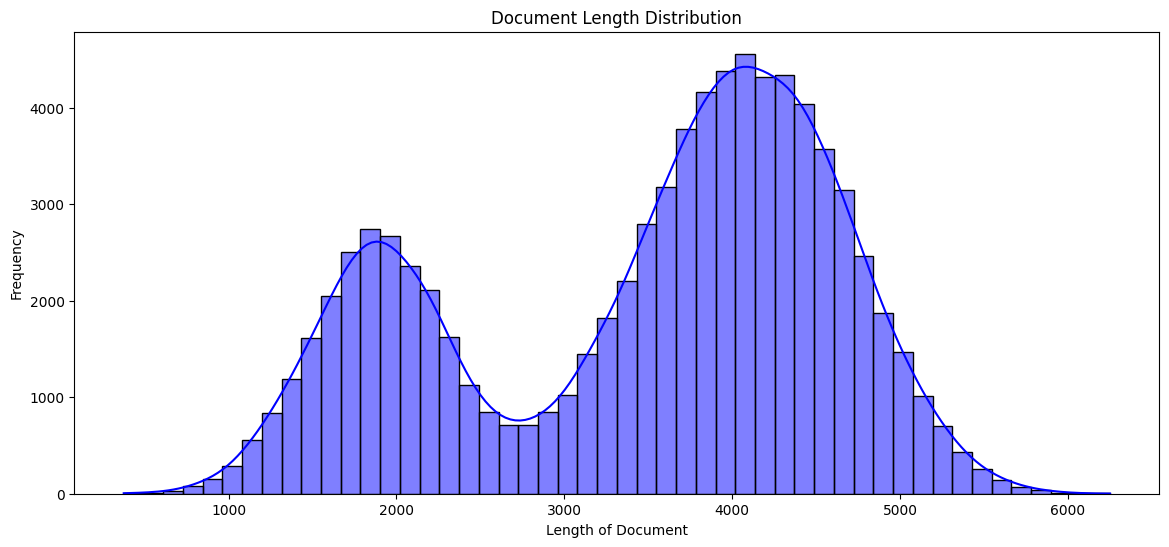

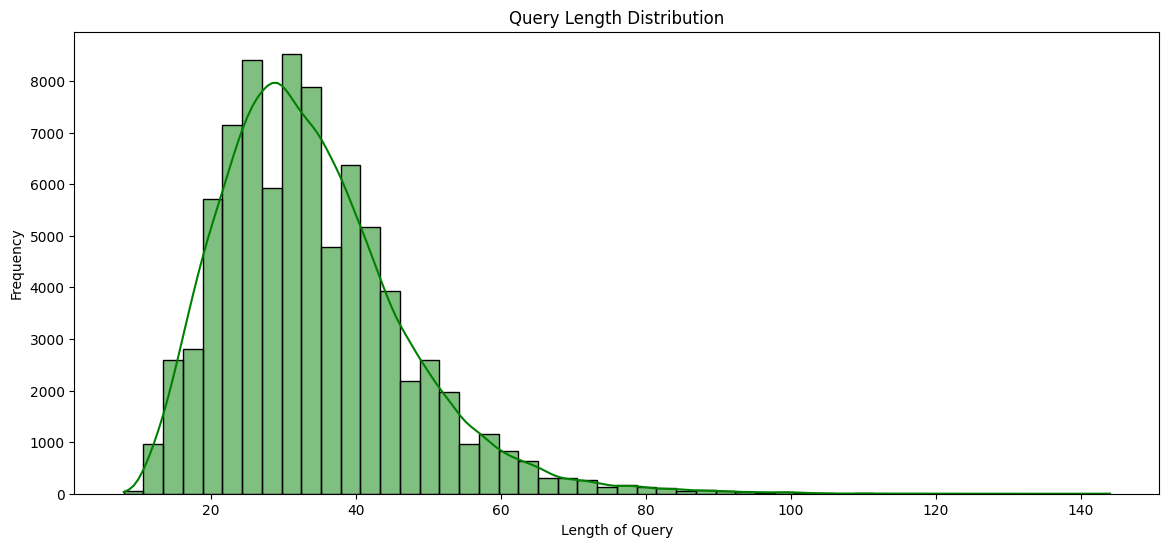

In [36]:
if "passages" in df.columns and "query" in df.columns:

    def parse_passages(x):
        if isinstance(x, str):
            return ast.literal_eval(x)
        return x

    df["parsed_passages"] = df["passages"].apply(parse_passages)
    df["passage_count"] = df["parsed_passages"].apply(
        lambda x: len(x["passage_text"]) if isinstance(x, dict) else 0
    )
    df["document_length"] = df["parsed_passages"].apply(
        lambda x: sum(len(p) for p in x["passage_text"]) if isinstance(x, dict) else 0
    )
    df["query_length"] = df["query"].str.len()

    plt.figure(figsize=(14, 6))
    sns.histplot(df["document_length"], kde=True, color="blue", bins=50)
    plt.title("Document Length Distribution")
    plt.xlabel("Length of Document")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(14, 6))
    sns.histplot(df["query_length"], kde=True, color="green", bins=50)
    plt.title("Query Length Distribution")
    plt.xlabel("Length of Query")
    plt.ylabel("Frequency")
    plt.show()


Query Type Value Counts:

query_type
description    44961
numeric        22758
entity          8529
location        4052
person          2026
Name: count, dtype: int64


C:\Users\kaleb\AppData\Local\Temp\ipykernel_13244\3591990298.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='query_type', data=df, palette='viridis')


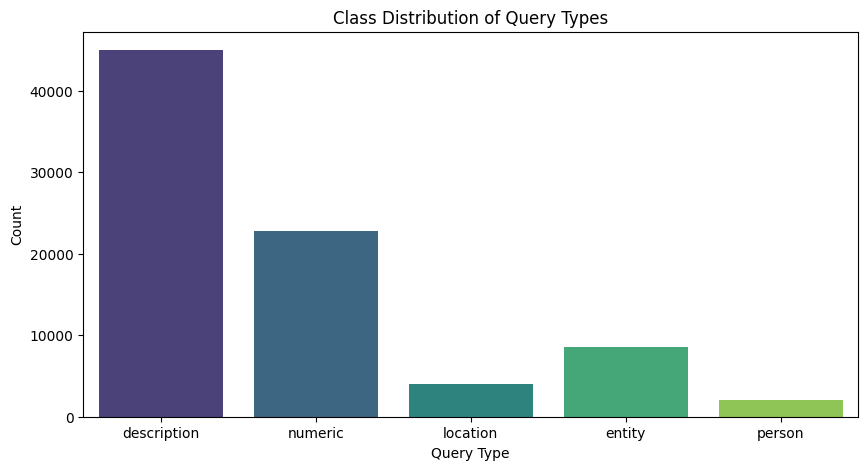

In [37]:
# Class Imbalance Check
if "query_type" in df.columns:
    print("\nQuery Type Value Counts:\n")
    print(df["query_type"].value_counts())

    # Plot the class distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(x="query_type", data=df, palette="viridis")
    plt.title("Class Distribution of Query Types")
    plt.xlabel("Query Type")
    plt.ylabel("Count")
    plt.show()

#### Numerical feature correlation



Correlation Matrix:



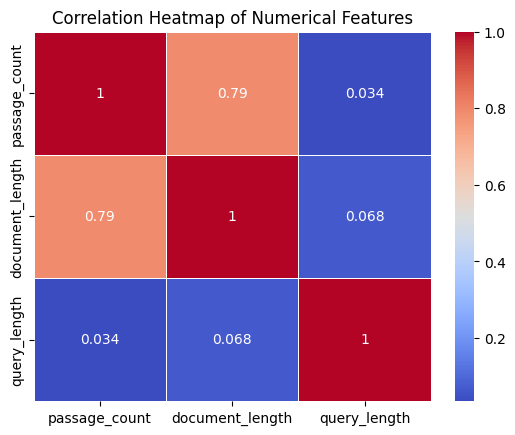

In [38]:
# If numerical features exist, evaluate correlations
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
if len(numerical_cols) > 0:
    print("\nCorrelation Matrix:\n")
    corr_matrix = df[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap of Numerical Features")
    plt.show()

#### Relationship Between Query Type and Document Lengths



Relationship Between Query and Document Lengths:



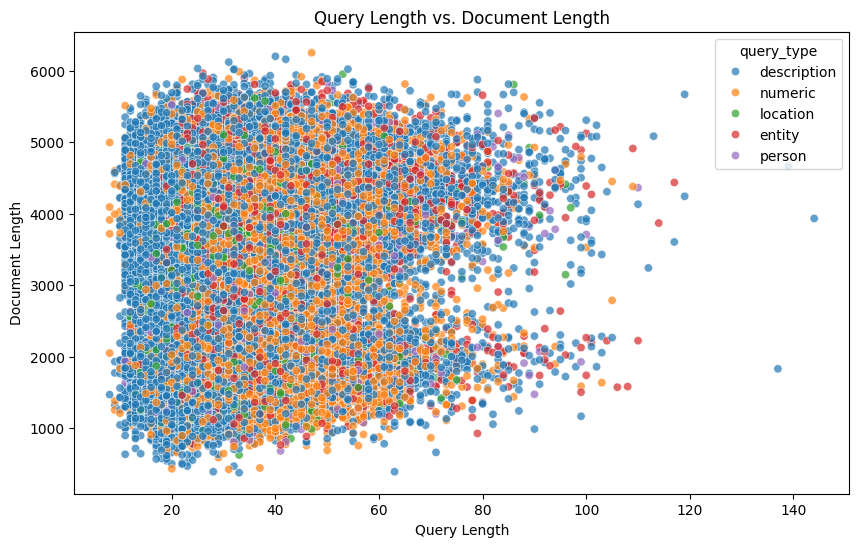

In [39]:
print("\nRelationship Between Query and Document Lengths:\n")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="query_length",
    y="document_length",
    hue="query_type",
    alpha=0.7,
    palette="tab10",
)
plt.title("Query Length vs. Document Length")
plt.xlabel("Query Length")
plt.ylabel("Document Length")
plt.show()

#### Keyword Analysis



Top 20 Most Common Words in Queries:

[('what', 34504), ('is', 28967), ('a', 15733), ('the', 15551), ('of', 13813), ('how', 12767), ('does', 10399), ('to', 10212), ('in', 9235), ('for', 7746), ('are', 5504), ('cost', 5441), ('do', 5355), ('long', 3993), ('much', 3672), ('average', 3584), ('where', 3348), ('can', 2742), ('definition', 2701), ('you', 2497)]


C:\Users\kaleb\AppData\Local\Temp\ipykernel_13244\770892407.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


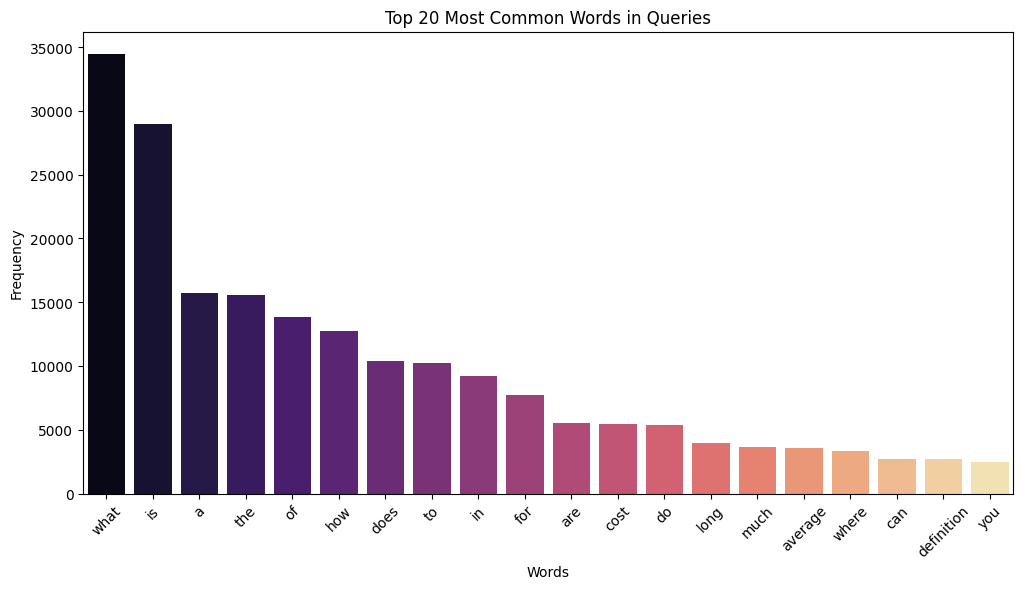

In [40]:
# Word frequency in queries
if "query" in df.columns:
    all_queries = " ".join(df["query"]).split()
    common_words = Counter(all_queries).most_common(20)

    print("\nTop 20 Most Common Words in Queries:\n")
    print(common_words)

    words, counts = zip(*common_words)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(counts), palette="magma")
    plt.xticks(rotation=45)
    plt.title("Top 20 Most Common Words in Queries")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

#### Interquartile Range (IQR) and Outlier Detection


In [41]:
print("\nInterquartile Range (IQR) and Outlier Detection:\n")
q1_doc = df["document_length"].quantile(0.25)
q3_doc = df["document_length"].quantile(0.75)
iqr_doc = q3_doc - q1_doc
print("Document Length IQR:", iqr_doc)

lower_bound_doc = q1_doc - 1.5 * iqr_doc
upper_bound_doc = q3_doc + 1.5 * iqr_doc
outliers_doc = df[
    (df["document_length"] < lower_bound_doc)
    | (df["document_length"] > upper_bound_doc)
]
print("Number of Outliers in Document Length:", len(outliers_doc))

q1_query = df["query_length"].quantile(0.25)
q3_query = df["query_length"].quantile(0.75)
iqr_query = q3_query - q1_query
print("Query Length IQR:", iqr_query)

lower_bound_query = q1_query - 1.5 * iqr_query
upper_bound_query = q3_query + 1.5 * iqr_query
outliers_query = df[
    (df["query_length"] < lower_bound_query) | (df["query_length"] > upper_bound_query)
]
print("Number of Outliers in Query Length:", len(outliers_query))


Interquartile Range (IQR) and Outlier Detection:

Document Length IQR: 1981.0
Number of Outliers in Document Length: 0
Query Length IQR: 16.0
Number of Outliers in Query Length: 1724


IQR gives us the range in which the middle 50% of the values lie.

For document length, 1981 suggests that the length of documents has a wide range for the central half of the data. This indicates significant variability in the length of documents.

For query length, the IQR of 16 suggests that the length of queries is more consistent, with a much narrower range for the middle 50% of values.


#### Text Similarity Analysis Between Query and Passage Text


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


Text Similarity Analysis Between Query and Passage Text:



C:\Users\kaleb\AppData\Local\Temp\ipykernel_13244\3308881774.py:11: RuntimeWarning: Mean of empty slice.
  return similarity_matrix[0, 1:].mean()
c:\Users\kaleb\Code\TwoTowerSearch\env\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


count    82323.000000
mean         0.301491
std          0.101081
min          0.012522
25%          0.229417
50%          0.290872
75%          0.361855
max          1.000000
Name: avg_text_similarity, dtype: float64


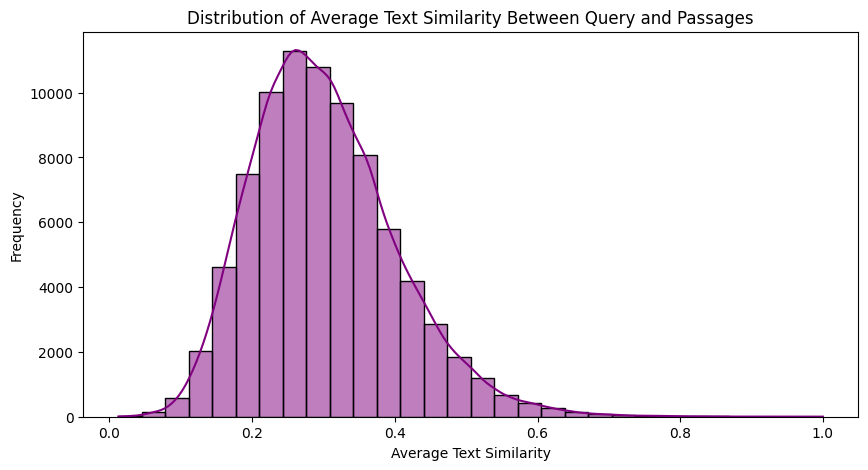

In [45]:
print("\nText Similarity Analysis Between Query and Passage Text:\n")
if "parsed_passages" in df.columns and "query" in df.columns:

    def calculate_similarity(row):
        if isinstance(row["parsed_passages"], dict):
            passage_texts = row["parsed_passages"]["passage_text"]
            texts = [row["query"]] + passage_texts
            vectorizer = TfidfVectorizer().fit_transform(texts)
            similarity_matrix = cosine_similarity(vectorizer)
            # Calculate average similarity between query and passages
            return similarity_matrix[0, 1:].mean()
        return np.nan

    df["avg_text_similarity"] = df.apply(calculate_similarity, axis=1)
    print(df["avg_text_similarity"].describe())

    # Plot distribution of average text similarity
    plt.figure(figsize=(10, 5))
    sns.histplot(df["avg_text_similarity"].dropna(), kde=True, color="purple", bins=30)
    plt.title("Distribution of Average Text Similarity Between Query and Passages")
    plt.xlabel("Average Text Similarity")
    plt.ylabel("Frequency")
    plt.show()

The analysis was performed for 82,323 rows in the dataset.

The average similarity between queries and their corresponding passages is 0.301. This suggests that, on average, the passages are only moderately related to the queries. A similarity score of 1 would indicate perfect similarity, while a score closer to 0 suggests little or no overlap.

Standard Deviation (std): The standard deviation of 0.101 shows the degree of variability in the similarity scores. A lower value indicates that most similarity scores are close to the mean, whereas a higher value would suggest greater diversity in the scores. Here, the scores show moderate variability.


Minimum and Maximum Similarity:

The minimum similarity score is 0.012, indicating that there are some queries with very little to no similarity to the passages.
The maximum similarity score is 1.0, indicating that, for some queries, there is a perfect match with at least one passage.
Percentiles:

25th Percentile (Q1): 0.229 – 25% of the similarity scores are below this value, indicating that for a significant proportion of queries, there is low similarity to the passages.

50th Percentile (Median): 0.291 – Half of the queries have similarity scores below this value, meaning that many queries do not have highly similar passages.

75th Percentile (Q3): 0.362 – Only 25% of the queries have similarity scores above this value, indicating that a minority of the queries have a moderately high level of similarity with their passages.
